# Data Loading, Cleaning and Feature Selection
The following tasks are executed:
- Data is loaded from raw files
- Columnnames are fixed
- Columns get correct object type
- Class columns are put as the last columns
- Missing data is replaced by NaN
- Data characteristics are visualized
- Missing data is visualized
- Data is saved to a new, cleaned file as a df

## Set Parameters

In [5]:
#Parameters
use_training_settings = False  #Use training or test settings

dataset_name = "omxs30"
class_name = "LongTrend"
outcome_columns = ['1dTrend', '5dTrend', '20dTrend', class_name]

if use_training_settings == True:
    image_save_directory = '02_Training_Data/images'
    filedataresultdirectory = '02_Training_Data'
    
    #To save time in the generation of test data and to skip the feature analysis, set this option to false. For training 
    #data, set it to true.
    #do_feature_analysis = True
    skip_feature_analysis = False
    skip_feature_selection = False
    
    filenameprefix = dataset_name + "_" + class_name
    filenamesuffix = ''
    filenameXsuffix = filenamesuffix
    filenameysuffix = filenamesuffix
else:
    filedataresultdirectory = '03_Test_Prepared_Data'
    image_save_directory = '03_Test_Prepared_Data/images'
    
    #To save time in the generation of test data and to skip the feature analysis, set this option to false. For training 
    #data, set it to true.
    #do_feature_analysis = True
    skip_feature_analysis = True
    skip_feature_selection = True
    
    filenameprefix = dataset_name + "_" + class_name
    filenamesuffix = '_test'
    filenameXsuffix = filenamesuffix
    filenameysuffix = filenamesuffix

#Binarize labels
binarize_labels = True
class_number = 1
binary_true_label = "Positive"
binary_false_label = "Negative"

In [6]:
#Created variables
data_file = filedataresultdirectory + "/" + filenameprefix + "_dataset" + filenamesuffix + ".csv"
print("Source path: ", data_file)

missingValueModelPath = filedataresultdirectory + "/" + filenameprefix + "_missing_value_model" + filenameXsuffix + ".csv"
#Features
X_filename = filedataresultdirectory + "/" + filenameprefix + "_X" + filenameXsuffix + ".csv"
#Outcomes
y_filename = filedataresultdirectory + "/" + filenameprefix + "_y" + filenameysuffix + ".csv"
#Original labels
ylabel_filename = filedataresultdirectory + "/" + filenameprefix + "_y" + "_labels" + filenameysuffix + ".csv"
#Modified labels
ylabel_model_filename = filedataresultdirectory + "/" + filenameprefix + "_y" + "_labels_model" + filenameysuffix + ".csv"
#Columns for feature selection
X_filename_selected_feature_column = filedataresultdirectory + "/" + filenameprefix + "_X" + filenameXsuffix + "_selected_feature_columns.csv"
#Original timegraph data
filename_timegraph = filedataresultdirectory + "/" + filenameprefix + "_timegraph" + filenameXsuffix + ".csv"

print("Missing value path: ", missingValueModelPath)
print("Save features to X: ", X_filename)
print("Save features to y: ", y_filename)
print("Load y labels from ", ylabel_filename)
print("Save labels for the model to ", ylabel_model_filename)
print("Selected feature column file name: ", X_filename_selected_feature_column)
print("Time graph path: ", filename_timegraph)

print("Feature analysis to be skipped: ", skip_feature_analysis)
print("Feature selection to be skipped: ", skip_feature_selection)

Source path:  03_Test_Prepared_Data/omxs30_LongTrend_dataset_test.csv
Missing value path:  03_Test_Prepared_Data/omxs30_LongTrend_missing_value_model_test.csv
Save features to X:  03_Test_Prepared_Data/omxs30_LongTrend_X_test.csv
Save features to y:  03_Test_Prepared_Data/omxs30_LongTrend_y_test.csv
Load y labels from  03_Test_Prepared_Data/omxs30_LongTrend_y_labels_test.csv
Save labels for the model to  03_Test_Prepared_Data/omxs30_LongTrend_y_labels_model_test.csv
Selected feature column file name:  03_Test_Prepared_Data/omxs30_LongTrend_X_test_selected_feature_columns.csv
Time graph path:  03_Test_Prepared_Data/omxs30_LongTrend_timegraph_test.csv
Feature analysis to be skipped:  True
Feature selection to be skipped:  True


## Load Libraries

In [7]:
# Import libraries
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.ticker import FuncFormatter, MaxNLocator
import DatavisualizationFunctions as vis
import DataSupportFunctions as sup

#Global settings
np.set_printoptions(precision=3)

#Suppress print out in scientific notiation
np.set_printoptions(suppress=True)

#Load skip cell kernel extension
#Source: https://stackoverflow.com/questions/26494747/simple-way-to-choose-which-cells-to-run-in-ipython-notebook-during-run-all
#%%skip True  #skips cell
#%%skip False #won't skip
#should_skip = True
#%%skip $should_skip
%load_ext skip_kernel_extension

The skip_kernel_extension extension is already loaded. To reload it, use:
  %reload_ext skip_kernel_extension


## Load dataset

### Load Features and Outcomes

In [8]:
#Load dataset
df = pd.read_csv(data_file, sep=';').set_index('id') #Set ID to be the data id
display(df.head(1))

#=== Get classes into a dict ===#
class_labels = dict(zip(df[class_name].unique(), list(range(1,len(df[class_name].unique())+1, 1))))
#Load class labels instead
df_y_classes = pd.read_csv(ylabel_filename, delimiter=';', header=None)
class_labels = sup.inverse_dict(df_y_classes.set_index(df_y_classes.columns[0]).to_dict()[1])
print("Loaded  classes from file", class_labels)

#=== Define classes manually ===#
#class_labels = {
#    0 : 'class1',
#    1 : 'class2'
#}

print(class_labels)

#=== Define index name ===#
#Define name if there is no index name

#df.index.name = 'id'

#=== rename colums ===#
#df.rename(columns={'model.year':'year'}, inplace=True)

#Rename columns with " "
df.columns = [x.replace(" ", "_") for x in df.columns]
df.columns = [x.replace("/", "-") for x in df.columns]

print("df size : ", df.shape)
display(df.head(5))

,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6,1dTrend,5dTrend,20dTrend,LongTrend
id,,,,,,,,,,,,,,,,,,,,,
400,1.0,1.0,1.0,0.951672,0.684372,0.4,0.65,0.5,0.51,0.5,...,0,1,0,0,0,0,0,0,1,2


Loaded  classes from file {0: 'neutral', 1: 'positive', 2: 'negative'}
{0: 'neutral', 1: 'positive', 2: 'negative'}
df size :  (291, 131)


,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6,1dTrend,5dTrend,20dTrend,LongTrend
id,,,,,,,,,,,,,,,,,,,,,
400,1.000000,1.000000,1.000000,0.951672,0.684372,0.4,0.65,0.50,0.51,0.5,...,0,1,0,0,0,0,0,0,1,2
401,1.000000,1.000000,1.000000,0.972492,0.699344,0.6,0.70,0.52,0.52,0.5,...,0,1,0,0,0,0,0,0,1,2
402,1.000000,1.000000,1.000000,1.000000,0.746339,0.8,0.70,0.54,0.52,0.5,...,0,1,0,0,0,0,0,0,1,2
403,0.366593,0.816386,0.867665,0.894494,0.667596,0.6,0.65,0.54,0.51,0.5,...,0,1,0,0,0,0,0,0,1,2
404,0.000000,0.739614,0.821563,0.857739,0.640164,0.6,0.60,0.54,0.51,0.5,...,0,0,1,0,0,0,0,0,1,2


### Load Time Series

In [9]:
#Load original data for visualization
import matplotlib.dates as mdates
import datetime

df_timegraph = pd.read_csv(filename_timegraph, delimiter=';').set_index('id')
df_timegraph['Time'] = pd.to_datetime(df_timegraph['Time'])
df_timegraph['Time'].apply(mdates.date2num)
print("Loaded feature names for time graph={}".format(df_timegraph.columns))
print("X. Shape={}".format(df_timegraph.shape))
display(df_timegraph.head())

Loaded feature names for time graph=Index(['Time', 'High', 'Low', 'Close'], dtype='object')
X. Shape=(291, 4)


,Time,High,Low,Close
id,,,,
400,2018-08-07,1621.26,1610.52,1619.89
401,2018-08-08,1624.10,1614.73,1622.63
402,2018-08-09,1631.74,1618.72,1631.23
403,2018-08-10,1627.44,1613.39,1616.82
404,2018-08-13,1616.34,1607.81,1611.80


## Data Cleanup of Features and Outcomes before Features are Modified

In [10]:
#Strip all string values to find the missing data
from pandas.api.types import is_string_dtype

for col in df.columns:
    if is_string_dtype(df[col]):
        print("Strip column {}".format(col))
        df[col]=df[col].str.strip()

In [11]:
#Replace values for missing data

#=== Replace all missing values with np.nan
for col in df.columns[0:-1]:
    df[col] = df[col].replace('?', np.nan)
    #df[col] = df[col].replace('unknown', np.nan)
    
print("Missing data in the data frame")
print(sum(df.isna().sum()))

Missing data in the data frame
0


In [12]:
#Get column types
print("Column types:")
print(df.dtypes)
print("\n")

Column types:
NormKurs5         float64
NormKurs20        float64
NormKurs50        float64
NormKurs100       float64
NormKurs200       float64
NumberRise5       float64
NumberRise20      float64
NumberRise50      float64
NumberRise100     float64
NumberRise200     float64
MA2Norm           float64
MA5Norm           float64
MA8Norm           float64
MA10Norm          float64
MA13Norm          float64
MA15Norm          float64
MA18Norm          float64
MA20Norm          float64
MA22Norm          float64
MA34Norm          float64
MA40Norm          float64
MA50Norm          float64
MA75Norm          float64
MA100Norm         float64
MA125Norm         float64
MA150Norm         float64
MA175Norm         float64
MA200Norm         float64
MA225Norm         float64
MA250Norm         float64
                   ...   
week_of_year        int64
day_of_year         int64
day_of_month        int64
day_week__0         int64
day_week__1         int64
day_week__2         int64
day_week__3         int6

## Split Features from Outcomes

In [13]:
#=== Extract Outcome columns ===#
outcomes_raw = df[outcome_columns]

print("Outcomes raw data")
display(outcomes_raw.head())
print(outcomes_raw.shape)

#=== Drop alternative y values ===#
features_raw=df.drop(outcomes_raw.columns, axis=1)

#=== Reorder columns to have the class as the last column if it is not done yet ===# -- OBSOLETE
#df = df[[c for c in df if c not in [class_name]] + [class_name]]

#=== Use only a subset header ===#
#header = ['Elevation', 'Aspect', 'Slope', 
#          'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
#          'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#          'Horizontal_Distance_To_Fire_Points'] + \
#         ['Wilderness_Area_{:d}'.format(i) for i in range(4)] + \
#         ['Soil_Type_{:d}'.format(i) for i in range(40)] + \
#          ['Cover_type']
# header=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
#         'marital-status', 'occupation', 'relationship', 'race', 'sex', 
#         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income50K']
#features.columns = header

print("Features")
display(features_raw.head())
print(features_raw.shape)


Outcomes raw data


,1dTrend,5dTrend,20dTrend,LongTrend
id,,,,
400,0,0,1,2
401,0,0,1,2
402,0,0,1,2
403,0,0,1,2
404,0,0,1,2


(291, 4)
Features


,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,month_year__9,month_year__10,month_year__11,month_year__12,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6
id,,,,,,,,,,,,,,,,,,,,,
400,1.000000,1.000000,1.000000,0.951672,0.684372,0.4,0.65,0.50,0.51,0.5,...,0,0,0,0,0,1,0,0,0,0
401,1.000000,1.000000,1.000000,0.972492,0.699344,0.6,0.70,0.52,0.52,0.5,...,0,0,0,0,0,1,0,0,0,0
402,1.000000,1.000000,1.000000,1.000000,0.746339,0.8,0.70,0.54,0.52,0.5,...,0,0,0,0,0,1,0,0,0,0
403,0.366593,0.816386,0.867665,0.894494,0.667596,0.6,0.65,0.54,0.51,0.5,...,0,0,0,0,0,1,0,0,0,0
404,0.000000,0.739614,0.821563,0.857739,0.640164,0.6,0.60,0.54,0.51,0.5,...,0,0,0,0,0,0,1,0,0,0


(291, 127)


In [14]:
print("feature columns: {}\n".format(features_raw.columns))
print("Outcome column: {}".format(outcomes_raw[class_name].name))

feature columns: Index(['NormKurs5', 'NormKurs20', 'NormKurs50', 'NormKurs100', 'NormKurs200',
       'NumberRise5', 'NumberRise20', 'NumberRise50', 'NumberRise100',
       'NumberRise200',
       ...
       'month_year__9', 'month_year__10', 'month_year__11', 'month_year__12',
       'week_month__1', 'week_month__2', 'week_month__3', 'week_month__4',
       'week_month__5', 'week_month__6'],
      dtype='object', length=127)

Outcome column: LongTrend


## Get Feature and Outcome Characteristics

In [15]:
#Show possible classes
print(class_labels)

{0: 'neutral', 1: 'positive', 2: 'negative'}


In [16]:
# Get number of samples
numSamples=features_raw.shape[0]
print("Number of samples={}".format(numSamples))

# Get number of features
numFeatures=features_raw.shape[1]
print("Number of features={}".format(numFeatures))

#Get the number of classes for the supervised learning
numClasses = outcomes_raw[class_name].value_counts().shape[0]
print("Number of classes={}".format(numClasses))

Number of samples=291
Number of features=127
Number of classes=3


## Analyse and Transform time series

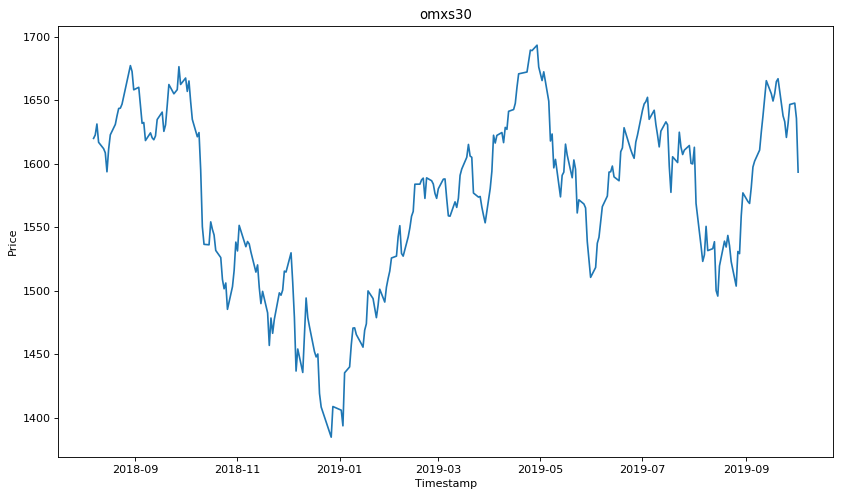

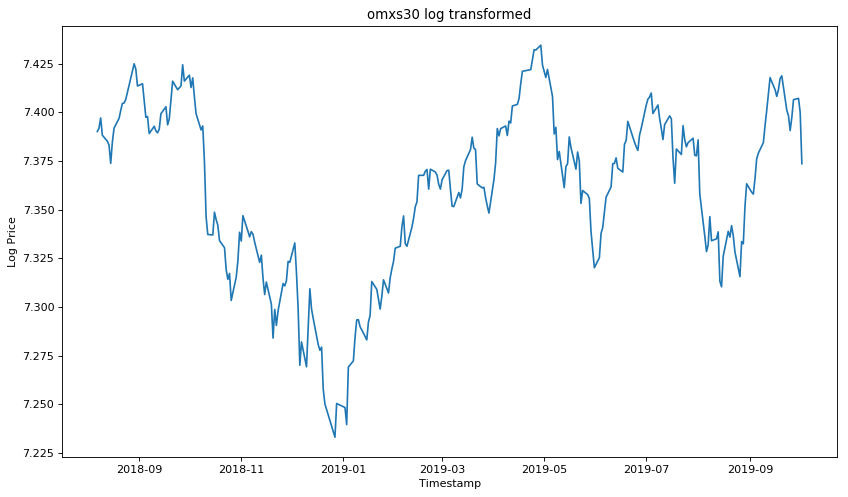

In [17]:
m.rc_file_defaults() #Reset sns

datatitle = dataset_name

plt.figure(num=None, figsize=(12.5, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_timegraph['Time'],df_timegraph['Close']) #To get scatter plot, add 'o' as the last parameter
plt.title(datatitle)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.show()

plt.figure(num=None, figsize=(12.5, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_timegraph['Time'],np.log(df_timegraph['Close']))
plt.title(datatitle + ' log transformed')
plt.xlabel("Timestamp")
plt.ylabel("Log Price")
plt.show()

## Analyse the Features Individually

In [18]:
# Print graphs for all features

def print_characteristics(df, save_graphs=False):
    for i, d in enumerate(df.dtypes):
        if is_string_dtype(d):
            print("Column {} is a categorical string".format(df.columns[i]))
            source = df[df.columns[i]].value_counts()/numSamples
            fig = vis.paintBarChartForCategorical(source.index, source)
        else:
            print("Column {} is a numerical value".format(df.columns[i]))
            fig = vis.paintHistogram(df, df.columns[i])

        plt.figure(fig.number)
        if save_graphs == True:
            plt.savefig(image_save_directory + '/{}-{}'.format(i, df.columns[i]), dpi=300)
        plt.show()

In [19]:
%%skip $skip_feature_analysis
save_graphs = False   #If set true, then all images are saved into the image save directory.

# Print graphs for all features
print_characteristics(features_raw, save_graphs=save_graphs)

In [20]:
%%skip $skip_feature_analysis
save_graphs = False   #If set true, then all images are saved into the image save directory.

# Print graphs for all features
print_characteristics(outcomes_raw, save_graphs=save_graphs)

In [21]:
#Optional Visualize all numeric values as melted
#melted = pd.melt(df, id_vars=[class_Name], value_name="MergedValues")
#melted['MergedValues'].describe()

#%matplotlib inline
#plt.figure(figsize=(12, 4))
#plt.hist(melted['MergedValues'], bins=list(range(0, 500)), log=True)
#plt.xlabel('Value')
#plt.ylabel('Count (log)')
#plt.title("Histogram of Features")
#plt.show()

In [22]:
#Visualize only the class to see if it is skewed
#vis.paintBarChartForCategorical(df[class_Name].value_counts().index, df[class_Name].value_counts())

## Prepare the Feature Columns

In [23]:
#=== Replace signs for missing values or other values with ===#
features = features_raw.copy()

#Custom replacements, replace only if there is something to replace, else it makes NAN of it
#value_replacements = {
#    'n': 0,
#    'y': 1,
#    'unknown': np.NAN
#}

#=== Replace all custom values and missing values with content from the value_replacement
for col in features.columns:
    #df_dig[col] = df[col].map(value_replacements)
    #df_dig[col] = df[col].replace('?', np.nan)
    
    #Everything to numeric
    features[col] = pd.to_numeric(features[col])
    #df_dig[col] = np.int64(df_dig[col])
    
display(features.head(5))

,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,month_year__9,month_year__10,month_year__11,month_year__12,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6
id,,,,,,,,,,,,,,,,,,,,,
400,1.000000,1.000000,1.000000,0.951672,0.684372,0.4,0.65,0.50,0.51,0.5,...,0,0,0,0,0,1,0,0,0,0
401,1.000000,1.000000,1.000000,0.972492,0.699344,0.6,0.70,0.52,0.52,0.5,...,0,0,0,0,0,1,0,0,0,0
402,1.000000,1.000000,1.000000,1.000000,0.746339,0.8,0.70,0.54,0.52,0.5,...,0,0,0,0,0,1,0,0,0,0
403,0.366593,0.816386,0.867665,0.894494,0.667596,0.6,0.65,0.54,0.51,0.5,...,0,0,0,0,0,1,0,0,0,0
404,0.000000,0.739614,0.821563,0.857739,0.640164,0.6,0.60,0.54,0.51,0.5,...,0,0,0,0,0,0,1,0,0,0


In [24]:
#Create one-hot-encoding for certain classes and replace the original class
#onehotlabels = pd.get_dummies(df_dig.iloc[:,1])

#Add one-hot-encondig columns to the dataset
#for i, name in enumerate(onehotlabels.columns):
#    df_dig.insert(i+1, column='Cylinder' + str(name), value=onehotlabels.loc[:,name])

#Remove the original columns
#df_dig.drop(columns=['cylinders'], inplace=True)

## Prepare the Outcomes

In [25]:
# Replace classes with digital values
outcomes = outcomes_raw.copy()
outcomes = outcomes.astype(int)
print("Outcome types")
print(outcomes.dtypes)

Outcome types
1dTrend      int32
5dTrend      int32
20dTrend     int32
LongTrend    int32
dtype: object


### Binarize Multiclass Dataset

In [26]:
#If the binaryize setting is used, then binarize the class of the outcome.
if binarize_labels==True:
    binarized_outcome = (outcomes[class_name] == class_number).astype(np.int_)
    y = binarized_outcome.values.flatten()
    print("y was binarized. Classes before: {}. Classes after: {}".format(np.unique(outcomes[class_name]), np.unique(y)))
    
    #Redefine class labels
    class_labels = {
        0 : binary_false_label,
        1 : binary_true_label
    }
    
    print("Class labels redefined to: {}".format(class_labels))
else:
    y = outcomes[class_name].values.flatten()
    print("No binarization was made. Classes: {}".format(np.unique(y)))

y was binarized. Classes before: [0 1 2]. Classes after: [0 1]
Class labels redefined to: {0: 'Negative', 1: 'Positive'}


In [27]:
#y = outcomes[class_name].values.flatten()
#y_labels = class_labels
#class_labels_inverse = sup.inverse_dict(class_labels)

print("y shape: {}".format(y.shape))
print("y labels: {}".format(class_labels))
print("y unique classes: {}".format(np.unique(y, axis=0)))

y shape: (291,)
y labels: {0: 'Negative', 1: 'Positive'}
y unique classes: [0 1]


## Determine Missing Data
Missing data is only visualized here as it is handled in the training algorithm in S40.

In [28]:
# Check if there are any nulls in the data
print("Missing data in the features: ", features.isnull().values.sum())
features[features.isna().any(axis=1)]

Missing data in the features:  0


,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,month_year__9,month_year__10,month_year__11,month_year__12,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6
id,,,,,,,,,,,,,,,,,,,,,


Number of missing values per feature


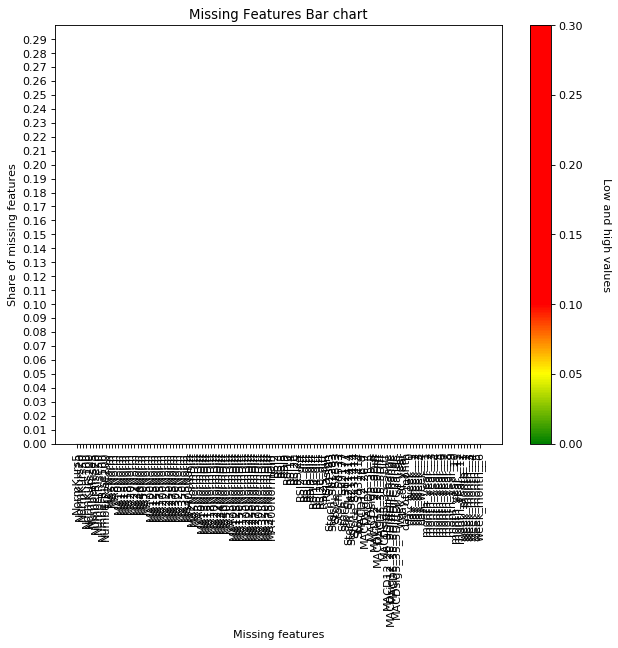

In [29]:
#Missing data part
print("Number of missing values per feature")
missingValueShare = []
for col in features.columns:
    #if is_string_dtype(df_dig[col]):
    missingValueShare.append(sum(features[col].isna())/numSamples)

#Print missing value graph
vis.paintBarChartForMissingValues(features.columns, missingValueShare)

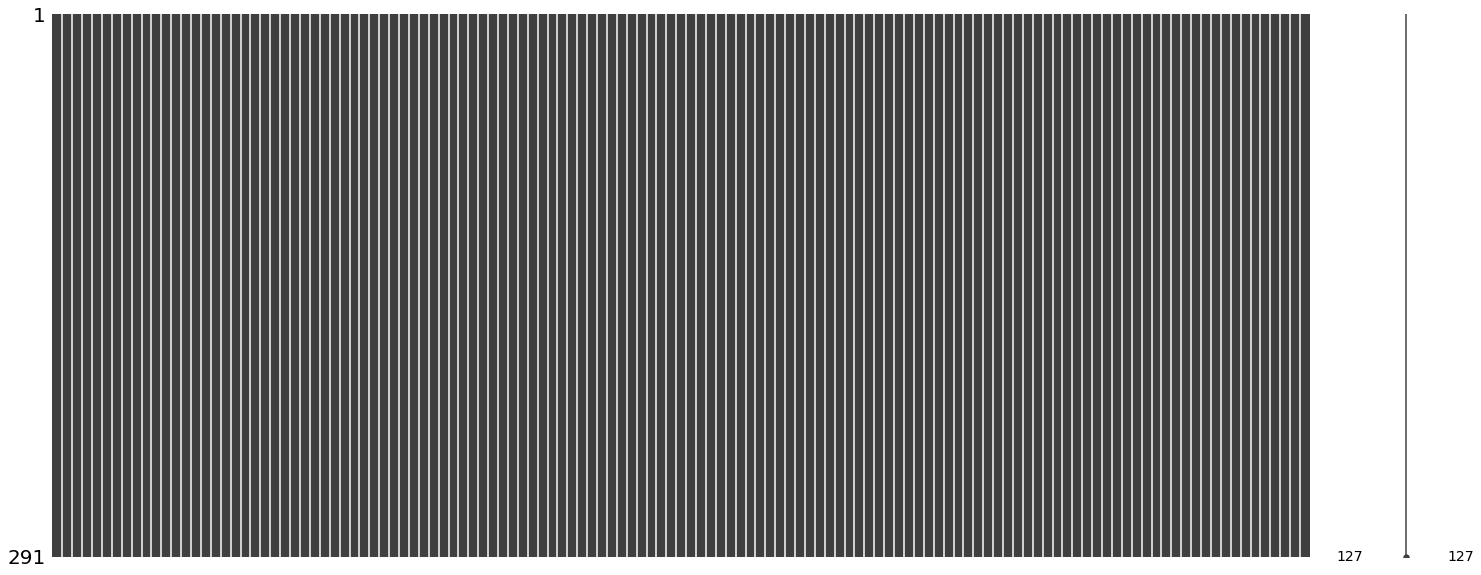

In [30]:
#Visualize missing data with missingno
import missingno as msno
%matplotlib inline
msno.matrix(features)

In [31]:
if features.isnull().values.sum()>0:
    msno.heatmap(features)

#### View Prepared Binary Features

We need some more plots for the binary data types.

In [32]:
#vis.plotBinaryValues(df_dig, df_dig.columns) #0:-1
#plt.savefig(image_save_directory + "/BinaryFeatures.png", dpi=70)

## Feature Visualization

### Auto Correlations of Time Dependent Variables

Source: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

#### Autoregression Intuition

Consider a time series that was generated by an autoregression (AR) process with a lag of k. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened. We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

#### Moving Average Intuition

Consider a time series that was generated by a moving average (MA) process with a lag of k. Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated. For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

if the autocorrelation function has a very long tail, then it is no stationary process

In [33]:
%%skip $skip_feature_analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

m.rc_file_defaults() #Reset sns

#Here, the time graph is selected
print("Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. "+
      "The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.")
plot_acf(np.log(df_timegraph['Close']))
plt.title("Autocorrelation function of the OMXS30 price")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

plot_acf(np.log(df_timegraph['Close']))
plt.title("Autocorrelation function of the OMXS30 price 600 first values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,700])
plt.show()

print("Ljung-Box statistics: p-value=", acorr_ljungbox(np.log(df_timegraph['Close']), lags=None, boxpierce="Ljung-Box")[1])
print("If p values > 0.05 then there are significant autocorrelations.")

plot_pacf(np.log(df_timegraph['Close']), lags=200)
plt.title("Partial Autocorrelation function of the OMXS30")
plt.xlabel("Lag")
plt.ylabel("Correlation")
#plt.xlim([0,700])
plt.show()

plot_pacf(np.log(df_timegraph['Close']), lags=50)
plt.title("Partial Autocorrelation function of the OMXS30 first 50 Values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,10])
plt.show()

In [34]:
%%skip $skip_feature_analysis
#Here, the time graph is selected
print("Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. "+
      "The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.")
plot_acf(df.MA200Norm)
plt.title("Autocorrelation function of the MA200 price")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

plot_acf(df.MA200Norm)
plt.title("Autocorrelation function of the MA200 price 600 first values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,200])
plt.show()

print("Ljung-Box statistics: p-value=", acorr_ljungbox(df.MA200Norm, lags=None, boxpierce="Ljung-Box")[1])
print("If p values > 0.05 then there are significant autocorrelations.")

plot_pacf(df.MA200Norm, lags=200)
plt.title("Partial Autocorrelation function of the OMXS30")
plt.xlabel("Lag")
plt.ylabel("Correlation")
#plt.xlim([0,700])
plt.show()

plot_pacf(df.MA200Norm, lags=50)
plt.title("Partial Autocorrelation function of the OMXS30 first 50 Values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,10])
plt.show()

In [35]:
%%skip $skip_feature_analysis
#Plot difference between time values to see if the differences are stationary
diff = pd.DataFrame(data=np.divide(df_timegraph['Close'] - df_timegraph['Close'].shift(1), df_timegraph['Close'])).set_index(df_timegraph['Time'])
diff=diff.iloc[1:,:]
fig = plt.figure(figsize= (15, 4))
plt.plot(df_timegraph['Time'].iloc[1:], diff)
plt.grid()

In [36]:
%%skip $skip_feature_analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

#Here, the time graph is selected
print("Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. "+
      "The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.")

plot_acf(diff)
plt.title("Autocorrelation function of the price difference")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.ylim([-0.2, 0.2])
plt.xlim([0,50])
plt.show()

plot_pacf(diff, lags=100)
plt.title("Partial Autocorrelation function of the OMXS30 price difference")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,50])
plt.ylim([-0.2, 0.2])
plt.show()

print("Ljung-Box statistics: p-value=", acorr_ljungbox(diff, lags=None, boxpierce="Ljung-Box")[1])
print("If p values > 0.05 then there are significant autocorrelations.")

# Feature Visualization
Here, feature selection and visulization of datasets is performed
Methods
- Feature visualization through t-SNE
- Feature visualization and analysis through PCA

### Standardize Data for Feature Selection and Visualization
Z-Normalize the data around zero and divided by standard deviation. Fit the normalizer on the training data and transform the training and the test data. The reason is that the scaler only must depend on the training data, in order to prevent leakage of information from the test data.

In [37]:
from sklearn import preprocessing

#=== Select the best type of scaler ===#
scaler = preprocessing.StandardScaler() #Because normal distribution. Don't use minmax scaler for PCA or unsupervised learning
# as the axis shall be centered and not shifted.


scaler.fit(features)
#Use this scaler also for the test data at the end
X_scaled = pd.DataFrame(data=scaler.transform(features), index = features.index, columns=features.columns)
print("Unscaled values")
display(features.iloc[0:2,:])
print("Scaled values")
display(X_scaled.iloc[0:2,:])

scaler.fit(y.reshape(-1, 1))
y_scaled = pd.DataFrame(data=scaler.transform(y.reshape(-1, 1)), index = features.index, columns=[class_name])
print("Unscaled values")
display(y[0:10])
print("Scaled values")
display(y_scaled.iloc[0:10,:])

Unscaled values


,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,month_year__9,month_year__10,month_year__11,month_year__12,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6
id,,,,,,,,,,,,,,,,,,,,,
400,1.0,1.0,1.0,0.951672,0.684372,0.4,0.65,0.50,0.51,0.5,...,0,0,0,0,0,1,0,0,0,0
401,1.0,1.0,1.0,0.972492,0.699344,0.6,0.70,0.52,0.52,0.5,...,0,0,0,0,0,1,0,0,0,0


Scaled values


,NormKurs5,NormKurs20,NormKurs50,NormKurs100,NormKurs200,NumberRise5,NumberRise20,NumberRise50,NumberRise100,NumberRise200,...,month_year__9,month_year__10,month_year__11,month_year__12,week_month__1,week_month__2,week_month__3,week_month__4,week_month__5,week_month__6
id,,,,,,,,,,,,,,,,,,,,,
400,1.090286,1.188451,1.251497,1.264126,0.392973,-0.560208,0.953021,-0.486171,-0.562994,-1.45412,...,-0.404969,-0.30657,-0.28598,-0.249086,-0.326288,1.810915,-0.557504,-0.552207,-0.493548,-0.058722
401,1.090286,1.188451,1.251497,1.330147,0.448806,0.263128,1.374494,-0.205465,-0.299600,-1.45412,...,-0.404969,-0.30657,-0.28598,-0.249086,-0.326288,1.810915,-0.557504,-0.552207,-0.493548,-0.058722


Unscaled values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Scaled values


,LongTrend
id,
400,-0.808337
401,-0.808337
402,-0.808337
403,-0.808337
404,-0.808337
405,-0.808337
406,-0.808337
407,-0.808337
408,-0.808337


### Feature and Outcomes Correlation Matrix

In [38]:
total_values = X_scaled.join(y_scaled)
print("Merged features and outcomes to use in correlation matrix")

Merged features and outcomes to use in correlation matrix


In [39]:
#Select column values to use in the correlation plot
feature_plot=list(range(0,10,1))
#Select outcomes to show
feature_plot.extend([-4, -3, -2, -1])

print(feature_plot)
print(total_values.columns[feature_plot])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -4, -3, -2, -1]
Index(['NormKurs5', 'NormKurs20', 'NormKurs50', 'NormKurs100', 'NormKurs200',
       'NumberRise5', 'NumberRise20', 'NumberRise50', 'NumberRise100',
       'NumberRise200', 'week_month__4', 'week_month__5', 'week_month__6',
       'LongTrend'],
      dtype='object')


In [40]:
%%skip $skip_feature_analysis
#http://benalexkeen.com/correlation-in-python/
#https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas
from matplotlib.artist import setp

m.rc_file_defaults() #Reset sns

axs = pd.plotting.scatter_matrix(total_values.iloc[:,feature_plot], figsize=(15, 15), alpha=0.2, diagonal='kde')
n = len(df.iloc[:,feature_plot].columns)
for i in range(n):
    for j in range(n):
        # to get the axis of subplots
        ax = axs[i, j]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
#plt.yticks(rotation=90)
plt.show()

In [41]:
%%skip $skip_feature_analysis
import seaborn as sns

# https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

feature_plot=list(range(0,10,1))
feature_plot.extend([-1])

g = sns.pairplot(total_values.iloc[0:1000,feature_plot], hue=class_name, diag_kind="hist")
#total_values.columns[-1]
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

plt.show()

In [42]:
%%skip $skip_feature_analysis
#http://benalexkeen.com/correlation-in-python/
matfig = plt.figure(figsize=(20, 20))
plt.matshow(total_values.corr(method='spearman'), fignum=1, cmap=plt.get_cmap('coolwarm')) #Use spearman correlation instead of pearson to have a robust correlation
plt.xticks(range(len(total_values.columns)), total_values.columns)
plt.yticks(range(len(total_values.columns)), total_values.columns)
plt.xticks(rotation=90)
plt.colorbar()
plt.show()

In [43]:
%%skip $skip_feature_analysis
subx = X_scaled.iloc[1000:2000, 0:4]
suby = y_scaled.iloc[1000:2000]

display(subx)
display(suby)

type(suby)
subx.corrwith(suby['LongTrend'], drop=True)

NormKurs5                      0.059468
NormKurs20                     0.182618
NormKurs50                     0.308961
NormKurs100                    0.449131
NormKurs200                    0.417423
NumberRise5                    0.131675
NumberRise20                   0.376344
NumberRise50                   0.502791
NumberRise100                  0.326203
NumberRise200                  0.117468
MA2Norm                       -0.036275
MA5Norm                       -0.061749
MA8Norm                       -0.080702
MA10Norm                      -0.096377
MA13Norm                      -0.118232
MA15Norm                      -0.131876
MA18Norm                      -0.152999
MA20Norm                      -0.166862
MA22Norm                      -0.180236
MA34Norm                      -0.270740
MA40Norm                      -0.309156
MA50Norm                      -0.366481
MA75Norm                      -0.469199
MA100Norm                     -0.530529
MA125Norm                     -0.540743


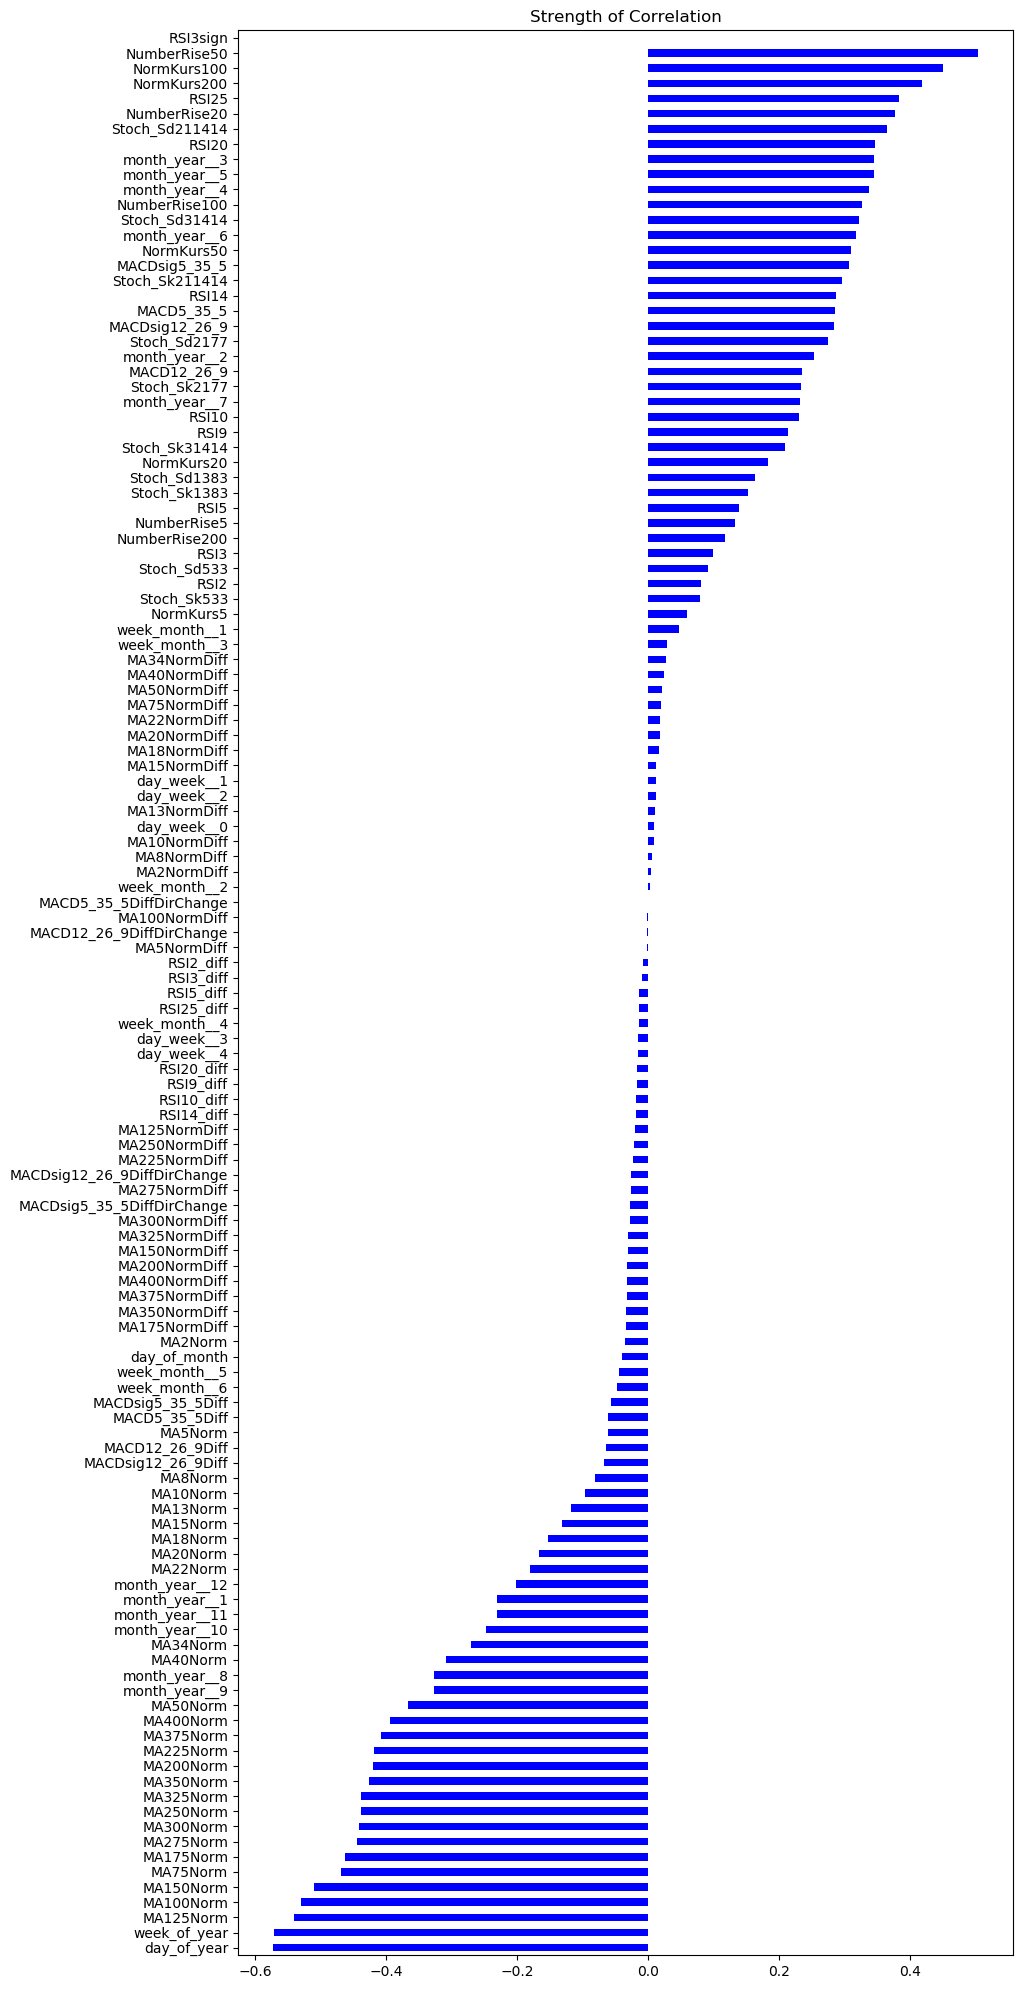

In [44]:
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from scipy.cluster import hierarchy
from scipy.spatial import distance

m.rc_file_defaults() #Reset sns

corr = X_scaled.corrwith(y_scaled[class_name], axis = 0)
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation', figsize=(10,25))
display(corr)

In [45]:
%%skip $skip_feature_analysis
#Only for time series continuous correlation
#Check correlations for the following attributes
cols = ['MA100Norm', 'RSI20']
col_index = [X_scaled.columns.get_loc(c) for c in cols if c in X_scaled]

tmp = X_scaled.iloc[:,col_index].join(df_timegraph).join(y_scaled).reset_index().set_index('Time').drop(columns=['id', 'High', 'Low', 'Close'])
#display(tmp)
tmp.dropna().resample('Q').apply(lambda x: x.corr()).iloc[:,-1].unstack().iloc[:,:-1].plot(title='Correlation of Features to Outcome\n (by quarter)', figsize=(12,10))

In [46]:
%%skip $skip_feature_analysis
corr_matrix = X_scaled.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage, row_cluster=True,col_cluster=True,figsize=(30,30),cmap=plt.get_cmap('coolwarm'))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

### Feature visualization with Parallel Coordinates

In [47]:
%%skip $skip_feature_analysis
#Select a random subset to visualize
import random

total_values = features.join(outcomes)
print("Merged features and outcomes to use in correlation matrix")

#Reduce the training set with the number of samples randomly chosen
X_train_index_subset = sup.get_data_subset_index(1000, features)

#Select column values to use in the correlation plot
feature_plot=list(range(0,10,1))
#cols = ['MA2Norm', 'MA50Norm', 'MA200Norm', 'MA400Norm', 'MA200NormDiff', 'MA400NormDiff']
cols = total_values.columns[feature_plot]
print(feature_plot)
print(cols)

comparison_name = class_name
print("Class name: ", comparison_name)

df_fv = total_values.iloc[X_train_index_subset, :]

In [48]:
%%skip $skip_feature_analysis
# Use parallel coordinates to visualize the classes and all features for plotting
#https://plot.ly/python/parallel-coordinates-plot/
#http://benalexkeen.com/parallel-coordinates-in-matplotlib/
from matplotlib import ticker

def plotParallelCoordinates(df, cols, colours, comparison_name):
    x = [i for i, _ in enumerate(cols)]

    # create dict of categories: colours
    colours = {df[comparison_name].astype('category').cat.categories[i]: colours[i] 
               for i, _ in enumerate(df[comparison_name].astype('category').cat.categories)}

    # Create (X-1) sublots along x axis
    fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

    # Get min, max and range for each column
    # Normalize the data for each column
    min_max_range = {}
    for col in cols:
        min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
        df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

    # Plot each row
    for i, ax in enumerate(axes):
        for idx in df.index:
            mpg_category = df.loc[idx, comparison_name]
            ax.plot(x, df.loc[idx, cols], colours[mpg_category])
        ax.set_xlim([x[i], x[i+1]])
    
    # Set the tick positions and labels on y axis for each plot
    # Tick positions based on normalised data
    # Tick labels are based on original data
    def set_ticks_for_axis(dim, ax, ticks):
        min_val, max_val, val_range = min_max_range[cols[dim]]
        step = val_range / float(ticks-1)
        tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
        norm_min = df[cols[dim]].min()
        norm_range = np.ptp(df[cols[dim]])
        norm_step = norm_range / float(ticks-1)
        ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
        ax.yaxis.set_ticks(ticks)
        ax.set_yticklabels(tick_labels)

    for dim, ax in enumerate(axes):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        set_ticks_for_axis(dim, ax, ticks=6)
        ax.set_xticklabels([cols[dim]])
    

    # Move the final axis' ticks to the right-hand side
    ax = plt.twinx(axes[-1])
    dim = len(axes)
    ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[-2], cols[-1]])

    # Remove space between subplots
    plt.subplots_adjust(wspace=0)

    # Add legend to plot
    plt.legend(
        [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[comparison_name].astype('category').cat.categories],
        df[comparison_name].astype('category').cat.categories,
        bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

    plt.title("Values of car attributes by LongTrend category")

    plt.show()

In [49]:
%%skip $skip_feature_analysis
m.rc_file_defaults() #Reset sns

colors = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']
plotParallelCoordinates(df_fv, cols, colors, comparison_name)

### Visualize Data with t-SNE

In [50]:
%%skip $skip_feature_analysis
#Select a random subset to visualize
import random

#Reduce the training set with the number of samples randomly chosen
X_train_index_subset = sup.get_data_subset_index(1000, X_scaled)

In [51]:
%%skip $skip_feature_analysis
from sklearn.manifold import TSNE
#%matplotlib notebook
#%matplotlib inline

np.random.seed(0)
#X_embedded = TSNE(n_components=2, perplexity=5.0, early_exaggeration=12.0, n_iter=5000, 
#                  n_iter_without_progress=1000, learning_rate=10).fit_transform(embedded)
X_embedded = TSNE(n_components=2, perplexity=10.0, early_exaggeration=100.0, n_iter=5000, 
                  n_iter_without_progress=1000, learning_rate=10).fit_transform(X_scaled.iloc[X_train_index_subset,:])

#### Plot t-SNE with best parameters

In [52]:
%matplotlib inline
m.rc_file_defaults() #Reset sns

In [53]:
%%skip $skip_feature_analysis
#Plot with texts added to the graphs

#from adjustText import adjust_text
targets = np.array(y[X_train_index_subset]).flatten()

plt.figure(figsize=(10,10))
texts = []
for i, t in enumerate(set(targets)):
    idx = targets == t
    #for x, y in zip(X_embedded[idx, 0], X_embedded[idx, 1]):
        #texts.append(plt.text(x, y, t))
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=class_labels[t])   

#adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5)) 

plt.legend(bbox_to_anchor=(1, 1));

#### t-SNE Parameter Grid Search

In [54]:
%%skip $skip_feature_analysis
from IPython.display import clear_output

#Optimize t-sne plot
tne_gridsearch = False

#Create a TSNE grid search with two variables
perplex = [5, 10, 30, 50, 100]
exaggregation = [5, 12, 20, 50, 100]
#learning_rate = [10, 50, 200]

fig, axarr = plt.subplots(len(perplex), len(exaggregation), figsize=(15,15))

if tne_gridsearch == True:
    #for m,l in enumerate(learning_rate):
    for k,p in enumerate(perplex):
        #print("i {}, p {}".format(i, p))
        for j,e in enumerate(exaggregation):
            #print("j {}, e {}".format(j, e))
            X_embedded = TSNE(n_components=2, perplexity=p, early_exaggeration=e, n_iter=5000, 
                              n_iter_without_progress=1000, learning_rate=10).fit_transform(X_scaled.iloc[X_train_index_subset,:])

            for i, t in enumerate(set(targets)):
                idx = targets == t
                axarr[k,j].scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=class_labels[t])

            axarr[k,j].set_title("p={}, e={}".format(p, e))
        
            clear_output(wait=True)
            print('perplex paramater={}/{}, exaggregation parameterj={}/{}'.format(k, len(perplex), j, len(exaggregation)))
        
fig.subplots_adjust(hspace=0.3)

### UMAP Cluster Analysis
Use a supervised/unsupervised analysis to make the clusters

In [55]:
%%skip $skip_feature_analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='poster')

import umap

#%time #Time of the whole cell
embeddingUnsupervised = umap.UMAP(n_neighbors=5).fit_transform(X_scaled)
#%time #Time of the whole cell
embeddingSupervised = umap.UMAP(n_neighbors=5).fit_transform(X_scaled, y=y)

In [56]:
%%skip $skip_feature_analysis
vis.plotUmap(embeddingUnsupervised, y, list(class_labels.values()), 'Dataset unsupervised clustering', cmapString='RdYlGn')
vis.plotUmap(embeddingSupervised, y, list(class_labels.values()), 'Dataset supervised clustering')

### PCA Analysis

In [57]:
%%skip $skip_feature_analysis
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

m.rc_file_defaults() #Reset sns

pca_trafo = PCA().fit(X_scaled);
pca_values = pca_trafo.transform(X_scaled)
#from adjustText import adjust_text
targets = np.array(y).flatten()

fig, ax1 = plt.subplots(figsize=(10, 8))
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o', color='green');
plt.xlabel("Principal Component")
plt.ylabel("Explained variance")
plt.xticks(np.arange(0, len(pca_trafo.explained_variance_ratio_)))
plt.hlines(0.95, 0, len(pca_trafo.explained_variance_ratio_.cumsum()), colors='red', linestyles='solid', label='95% variance covered')

fig = plt.figure()
sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(X_scaled.shape[1]))), cmap="hot", cbar=True)

necessary_components = pca_trafo.explained_variance_ratio_.cumsum()[pca_trafo.explained_variance_ratio_.cumsum()<0.95]
print("95% variance covered with the {} first components. Values={}". format(len(necessary_components), necessary_components))

plt.figure(figsize=(10,10))
#plt.scatter(pca_values[:,0], pca_values[:,1], c=targets, edgecolor='none', label=class_labels.values(), alpha=0.5)
for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(pca_values[idx, 0], pca_values[idx, 1], label=class_labels[t], edgecolor='none', alpha=0.5)  

plt.legend(labels=class_labels.values(), bbox_to_anchor=(1, 1));
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## Feature Selection

In [58]:
#Data has already been scaled

In [59]:
#Select a random subset to visualize
import random

#Reduce the training set with the number of samples randomly chosen
X_train_index_subset = sup.get_data_subset_index(1000, X_scaled)

relevantFeatureList = []
selected_feature_list = pd.DataFrame()

No change of data. Size remains  291
Created a training subset


In [60]:
#Predict with logistic regression
from sklearn.linear_model import LogisticRegression

def predict_features_simple(X, y):
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
    return clf.score(X, y)

### Lasso Feature Selection

In [61]:
%%skip $skip_feature_selection
#%matplotlib inline
from sklearn.linear_model import LassoCV

m.rc_file_defaults() #Reset sns

def execute_lasso_feature_selection(X_scaled, y):
    reg = LassoCV(cv=10, max_iter = 100000)
    reg.fit(X_scaled, y)
    coef = pd.Series(reg.coef_, index = X_scaled.columns)
    print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X_scaled,y))
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    imp_coef = coef.sort_values()
    coefList = list(imp_coef[imp_coef!=0].index)
    print(coefList)

    #plt.figure()
    m.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    plt.show()
    
    return coefList
    
#if do_feature_analysis==True:
coefList = execute_lasso_feature_selection(X_scaled, y)
selected_feature_list = selected_feature_list.append(pd.Series(name='Lasso', data=coefList))
relevantFeatureList.extend(coefList)

print("Prediction of training data with logistic regression: {0:.2f}".format(predict_features_simple(X_scaled[coefList], y)))

### Tree based feature selection

In [62]:
%%skip $skip_feature_selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

def execute_treebased_feature_selection(X_scaled, y):
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X_scaled, y)
    print(clf.feature_importances_)
    print("Best score: %f" %clf.score(X_scaled, y))
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X_scaled)
    X_new.shape

    threshold = 0.010
    tree_coef = pd.Series(clf.feature_importances_, index = X_scaled.columns)

    print("Tree search picked " + str(sum(tree_coef >= threshold)) + " variables and eliminated the other " +  str(sum(tree_coef < threshold)) + " variables")
    imp_treecoef = tree_coef.sort_values()
    treecoefList = list(imp_treecoef[imp_treecoef>threshold].index)
    print(treecoefList)

    plt.figure()
    m.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_treecoef.plot(kind = "barh")
    plt.title("Feature importance using Tree Search Model")
    plt.vlines(threshold, 0, len(X_scaled.columns), color='red')
    plt.show()
    
    return treecoefList

#if do_feature_analysis==True:
treecoefList = execute_treebased_feature_selection(X_scaled, y)
selected_feature_list = selected_feature_list.append(pd.Series(name='Tree', data=treecoefList))
relevantFeatureList.extend(treecoefList)

print("Prediction of training data with logistic regression: {0:.2f}".format(predict_features_simple(X_scaled[treecoefList], y)))

### Backward Elimination

In [63]:
%%skip $skip_feature_selection
#Backward Elimination - Wrapper method
import statsmodels.api as sm

def execute_backwardelimination_feature_selection(X_scaled, y):
    cols = list(X_scaled.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X_scaled[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols

    print(selected_features_BE)
    print("\nNumber of features={}. Original number of features={}\n".format(len(selected_features_BE), len(X_scaled.columns)))
    [print("column {} removed".format(x)) for x in X_scaled.columns if x not in selected_features_BE]
    print("Finished")
    
    return selected_features_BE

#if do_feature_analysis==True:
selected_features_BE = execute_backwardelimination_feature_selection(X_scaled, y)
relevantFeatureList.extend(selected_features_BE)
selected_feature_list = selected_feature_list.append(pd.Series(name='Backward_Elimination', data=selected_features_BE))

print("Prediction of training data with logistic regression: {0:.2f}".format(predict_features_simple(X_scaled[selected_features_BE], y)))

### Recursive Elimination with Logistic Regression

In [64]:
%%skip $skip_feature_selection
#Recursive Elimination - Wrapper method, Feature ranking with recursive feature elimination
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE

def execute_recursive_elimination_feature_selection(X_scaled, y):
    model = LogisticRegressionCV(solver='liblinear', cv=3)
    print("Start Recursive Elimination. Fit model with {} examples.".format(X_scaled.shape[0]))
    #Initializing RFE model, 3 features selected
    rfe = RFE(model, 1) #It has to be one to get a unique index
    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X_scaled,y)
    #Fitting the data to model
    model.fit(X_rfe,y)

    print("Best accuracy score using built-in Logistic Regression: ", model.score(X_rfe, y))
    print("Ranking")
    rfe_coef = pd.Series(X_scaled.columns, index = rfe.ranking_-1).sort_index()
    print(rfe_coef)
    print("Select columns")

    
    print(X_scaled.columns[rfe.support_].values)
    
    return X_scaled.columns[rfe.support_].values, rfe_coef

#if do_feature_analysis==True:
relevant_features, rfe_coef = execute_recursive_elimination_feature_selection(X_scaled.iloc[X_train_index_subset], y[X_train_index_subset])
relevantFeatureList.extend(relevant_features)

step_size = np.round(len(X_scaled.columns)/4,0).astype("int")
for i in range(step_size, len(X_scaled.columns), step_size):
    selected_feature_list = selected_feature_list.append(pd.Series(name='RecursiveTop' + str(i), data=rfe_coef.loc[0:i-1]))
    print('Created RecursiveTop{}'.format(str(i)))

In [65]:
#rfe_coef.loc[0:10].values

### Weighted values

In [66]:
#Weights
values, counts = np.unique(relevantFeatureList, return_counts=True)
s = pd.Series(index=values, data=counts).sort_values(ascending=False)
print(s)

Series([], dtype: int64)


### Add Manually Selected Subset

In [67]:
#print subset
newval = [x for x, c in zip(values, counts) if c>1]
subsetColumns = newval#X.columns[rfe.support_].values #list(values)
display(subsetColumns)
selected_feature_list = selected_feature_list.append(pd.Series(name='Manual', data=subsetColumns))

[]

### Add all columns

In [68]:
selected_feature_list = selected_feature_list.append(pd.Series(name='All', data=X_scaled.columns))

In [69]:
#subsetColumns = X.columns[rfe.support_].values
#X_subset = X_raw[subsetColumns]
#display(X_subset.head(5))
selected_feature_list.transpose()

,Manual,All
0,NaN,NormKurs5
1,NaN,NormKurs20
2,NaN,NormKurs50
3,NaN,NormKurs100
4,NaN,NormKurs200
5,NaN,NumberRise5
6,NaN,NumberRise20
7,NaN,NumberRise50
8,NaN,NumberRise100
9,NaN,NumberRise200


## Save Subset

In [70]:
import csv

#Save features to a csv file
print("Features shape {}".format(df.shape, features.shape))
features.to_csv(X_filename, sep=';', index=True)
#np.savetxt(filenameprefix + "_X.csv", X, delimiter=";", fmt='%s')
print("Saved features to " + X_filename)

#Save y to a csv file
print("y shape {}".format(y.shape))
y_true = pd.DataFrame(y, columns=[class_name], index=outcomes.index)
y_true.to_csv(y_filename, sep=';', index=True, header=True)
#outcomes[class_name].to_csv(y_filename, sep=';', index=True, header=True)
print("Saved features to " + y_filename)

#Save new y labels to a csv file as a dict
print("Class labels length {}".format(len(class_labels)))
with open(ylabel_model_filename, 'w') as f:
    for key in class_labels.keys():
        f.write("%s;%s\n"%(class_labels[key], key))  #Classes are saved inverse to the labelling in the file, i.e. first value, then key
print("Saved class names and id to " + ylabel_model_filename)

#Save x subset column names to a csv file as a list
selected_feature_list.transpose().to_csv(X_filename_selected_feature_column, sep=';', index=False, header=True)
#print("Selected columns length {}".format(len(subsetColumns)))
#with open(X_filename_selected_feature_column, 'w') as f:
#    for item in subsetColumns:
#        f.write("%s\n"%(item))
print("Saved selected feature columns to " + X_filename_selected_feature_column)

print("=== Data for {} prepared to be trained ===". format(filenameprefix))

Features shape (291, 131)
Saved features to 03_Test_Prepared_Data/omxs30_LongTrend_X_test.csv
y shape (291,)
Saved features to 03_Test_Prepared_Data/omxs30_LongTrend_y_test.csv
Class labels length 2
Saved class names and id to 03_Test_Prepared_Data/omxs30_LongTrend_y_labels_model_test.csv
Saved selected feature columns to 03_Test_Prepared_Data/omxs30_LongTrend_X_test_selected_feature_columns.csv
=== Data for omxs30_LongTrend prepared to be trained ===


## Debug and Experiment

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')

from tqdm import tqdm
import time
%matplotlib inline

pbar = tqdm(total=100)
for i in range(10):
    time.sleep(0.1)
    pbar.update(10)
pbar.close()

from statsmodels import robust

a = np.matrix( [
    [ 80, 76, 77, 78, 79, 81, 76, 77, 79, 84, 75, 79, 76, 78 ],
    [ 66, 69, 76, 72, 79, 77, 74, 77, 71, 79, 74, 66, 67, 73 ]
    ], dtype=float )
robust.mad(a, axis=1)

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_timegraph['Close'])
plt.show()